In [199]:
import numpy as np
import pandas as pd

In [200]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')


In [201]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [202]:
match.shape

(756, 18)

In [203]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [204]:
delivery.groupby(['match_id', 'inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [205]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [206]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [207]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [208]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [209]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [210]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [211]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
       'Lucknow Super Giants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals', 'Punjab Kings']

In [212]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Deccan Charges', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Charges', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')
match_df['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')

In [213]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [214]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals', 'Lucknow Super Giants'],
      dtype=object)

In [215]:
match_df.shape

(611, 20)

In [216]:
match_df = match_df[match_df['dl_applied'] == 0]

In [217]:
match_df.shape

(593, 20)

In [218]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [219]:
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
2,3,Rajkot,Kolkata Knight Riders,183
4,5,Bangalore,Royal Challengers Bangalore,157
5,6,Hyderabad,Sunrisers Hyderabad,135
6,7,Mumbai,Mumbai Indians,178


In [220]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [221]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [222]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141509,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
141510,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
141511,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
141512,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [223]:
delivery_df.shape

(68415, 24)

In [224]:
delivery_df.sample

<bound method NDFrame.sample of         match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
141509     11415  Hyderabad       Mumbai Indians           152       2   
141510     11415  Hyderabad       Mumbai Indians           152       2   
141511     11415  Hyderabad       Mumbai Indians           152       2   
141512     11415  Hyderabad       Mumbai Indians           152       2   
141513     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125    

In [225]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [226]:

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [227]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [228]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [229]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141509,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
141510,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
141511,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
141512,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [230]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115


In [231]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [232]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141509,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,0,NaN,NaN,152,0,4
141510,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,0,NaN,NaN,154,-2,3
141511,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,1,run out,KH Pandya,155,-3,2
141512,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,0,NaN,NaN,157,-5,1


In [233]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left'] = 10 - wickets

In [234]:
delivery_df.head(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
130,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,4,0,NaN,NaN,11,196,114,10
131,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,11,196,113,10
132,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,NaN,NaN,11,196,112,10
133,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,1,0,NaN,NaN,12,195,111,10
134,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,NaN,NaN,12,195,110,10


In [235]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [236]:
delivery_df['rrr'] = (delivery_df['current_score']*6)/(delivery_df['balls_left'])

In [237]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [238]:
delivery_df['result'] = delivery_df.apply(result, axis = 1)

In [239]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]

In [240]:
final_df = final_df.sample(final_df.shape[0])

In [241]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
57157,Mumbai Indians,Rajasthan Royals,Jaipur,148,106,10,162,6.0,0.8,1
13719,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,65,24,5,178,7.1,28.2,0
99544,Rajasthan Royals,Royal Challengers Bangalore,Pune,75,11,1,180,5.8,57.3,0
134708,Mumbai Indians,Royal Challengers Bangalore,Mumbai,26,13,6,179,8.6,70.6,1
37140,Rajasthan Royals,Mumbai Indians,Jaipur,154,89,7,174,3.9,1.3,0
...,...,...,...,...,...,...,...,...,...,...
17090,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,89,16,2,197,6.2,40.5,0
97113,Mumbai Indians,Royal Challengers Bangalore,Mumbai,70,19,6,235,9.8,52.1,0
102326,Kings XI Punjab,Rising Pune Supergiants,Chandigarh,51,40,9,152,7.6,15.2,1
48020,Kings XI Punjab,Rajasthan Royals,Jaipur,143,82,8,191,7.6,3.5,0


In [242]:
final_df['batting_team'].unique()

array(['Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Kings XI Punjab', 'Gujarat Lions',
       'Rising Pune Supergiants'], dtype=object)

In [243]:
final_df['batting_team'] = final_df['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
final_df['bowling_team'] = final_df['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

final_df['batting_team'] = final_df['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
final_df['bowling_team'] = final_df['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')

final_df['batting_team'] = final_df['batting_team'].str.replace('Deccan Charges', 'Sunrisers Hyderabad')
final_df['bowling_team'] = final_df['bowling_team'].str.replace('Deccan Charges', 'Sunrisers Hyderabad')

final_df['batting_team'] = final_df['batting_team'].str.replace('Gujarat Lions', 'Gujarat Titans')
final_df['bowling_team'] = final_df['bowling_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

final_df['batting_team'] = final_df['batting_team'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')
final_df['bowling_team'] = final_df['bowling_team'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')

In [244]:
final_df = final_df[final_df['batting_team'].isin(teams)]
final_df = final_df[final_df['bowling_team'].isin(teams)]

In [245]:
final_df['batting_team'].unique()

array(['Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [246]:
final_df = final_df.sample(final_df.shape[0])

In [247]:
final_df.head(20)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
62781,Chennai Super Kings,Kolkata Knight Riders,Kolkata,93,90,9,119,5.2,1.7,1
139338,Sunrisers Hyderabad,Mumbai Indians,Mumbai,57,27,5,170,7.3,25.1,0
137592,Rajasthan Royals,Kolkata Knight Riders,Kolkata,71,34,5,185,8.0,20.1,1
40973,Kolkata Knight Riders,Rajasthan Royals,Jaipur,67,58,9,159,8.9,9.5,1
86672,Kolkata Knight Riders,Punjab Kings,Bangalore,31,22,6,199,10.3,45.8,1
104712,Kolkata Knight Riders,Lucknow Super Giants,Pune,53,38,7,160,7.8,16.9,1
54342,Kolkata Knight Riders,Delhi Capitals,Delhi,59,48,9,153,7.8,11.8,1
105164,Delhi Capitals,Gujarat Titans,Delhi,140,74,7,172,4.2,2.6,0
93128,Delhi Capitals,Kolkata Knight Riders,Kolkata,167,113,10,171,3.4,0.2,0
79442,Chennai Super Kings,Punjab Kings,Cuttack,104,24,6,231,7.9,31.8,0


In [248]:
final_df.shape

(68415, 10)

In [249]:
final_df.dropna(inplace = True)

In [250]:
final_df = final_df[final_df['balls_left'] != 0]

In [251]:
final_df.shape

(67363, 10)

In [252]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [253]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
111926,Gujarat Titans,Mumbai Indians,Kanpur,51,48,7,172,10.1,15.1
65425,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,136,91,9,171,7.2,2.3
87349,Punjab Kings,Rajasthan Royals,Pune,109,78,7,162,7.6,4.1
78472,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,35,14,4,170,7.6,57.9
19019,Rajasthan Royals,Mumbai Indians,Jaipur,62,37,5,145,6.0,13.5
...,...,...,...,...,...,...,...,...,...
100935,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,58,8,4,227,9.1,126.8
26682,Mumbai Indians,Rajasthan Royals,Durban,122,90,8,145,4.6,1.5
120184,Delhi Capitals,Chennai Super Kings,Pune,90,34,6,218,8.9,22.6
29376,Delhi Capitals,Punjab Kings,Chandigarh,115,99,8,142,7.7,1.6


In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [256]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [257]:
pipe.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [258]:
y_pred = pipe.predict(X_test)

In [259]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8129592518370073

In [260]:
pipe.predict_proba(X_test)[50]

array([0.51139357, 0.48860643])

In [261]:
pipe.predict_proba(X_test)[81]

array([0.84857992, 0.15142008])

In [262]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row[total_runs_x]))

In [263]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over', 'runs_after_over','wickets_in_over','lose', 'win']]
    return temp_df,target

In [264]:
temp_df, target = match_progression(delivery_df,78,pipe)
temp_df

Target- 196


,end_of_over,runs_after_over,wickets_in_over,lose,win
13136,1,5,0,74.0,26.0
13143,2,11,1,77.6,22.4
13151,3,14,0,65.7,34.3
13158,4,9,0,60.6,39.4
13164,5,5,1,75.2,24.8
13170,6,7,0,73.3,26.7
13177,7,3,1,85.9,14.1
13183,8,16,0,75.4,24.6
13190,9,4,0,77.1,22.9
13196,10,4,0,78.7,21.3


Text(0.5, 1.0, 'Target-196')

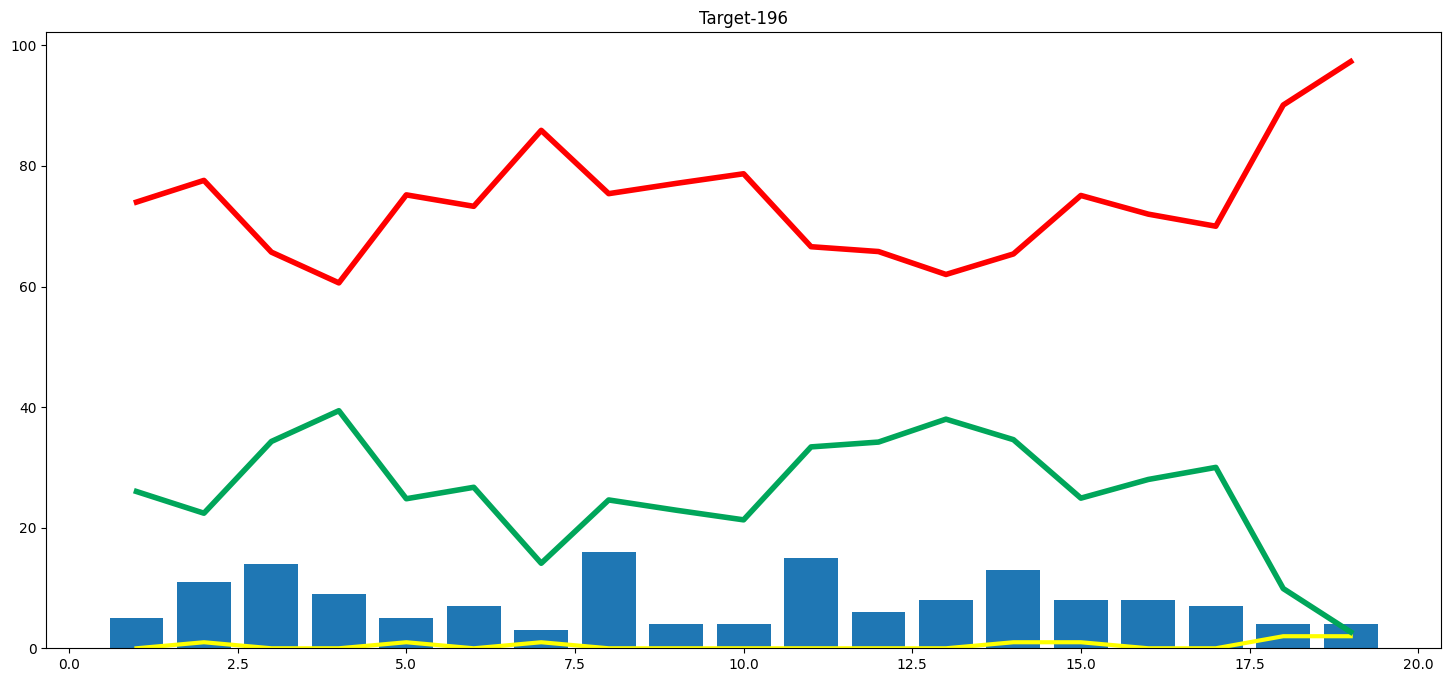

In [265]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [266]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Punjab Kings']

In [267]:
delivery_df['city']

125       Hyderabad
126       Hyderabad
127       Hyderabad
128       Hyderabad
129       Hyderabad
            ...    
141509    Hyderabad
141510    Hyderabad
141511    Hyderabad
141512    Hyderabad
141513    Hyderabad
Name: city, Length: 68415, dtype: object

In [268]:
delivery_df['city'].unique()

array(['Hyderabad', 'Rajkot', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata',
       'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Dharamsala', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       nan, 'Cuttack', 'Visakhapatnam', 'Mohali', 'Bengaluru'],
      dtype=object)

In [269]:
import pickle
pickle.dump(pipe,open('pipe.pkl', 'wb'))